#  Install and Import Packages

You may get an error when trying to install geopandas directly via the Jupyter notebook. Do not worry I will demo how to do it via conda and the prompt of comand

In [ ]:
%pip install git+git://github.com/geopandas/geopandas.git

In [ ]:
%pip install matplotlib.pyplot
%pip install numpy
%pip install shapely.geometry

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon

# Import Shapefile and Show Data

In [3]:
Points_Shape = gpd.read_file("Data/Shapefiles/Points.shp")
Lines_Shape = gpd.read_file("Data/Shapefiles/Lines.shp")
Polygons_Shape = gpd.read_file("Data/Shapefiles/Polygons.shp")

In [4]:
type(Points_Shape)

geopandas.geodataframe.GeoDataFrame

In [5]:
Points_Shape.head()

ID                   geometry
0   7  POINT (-4.67415 57.32240)
1   8  POINT (-6.57746 58.18926)
2   3  POINT (-5.96210 55.91855)
3   4  POINT (-6.79427 54.72280)
4   6  POINT (-3.07777 56.04782)

In [6]:
Points_Shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Plot Basic Shapefiles

<Axes: >

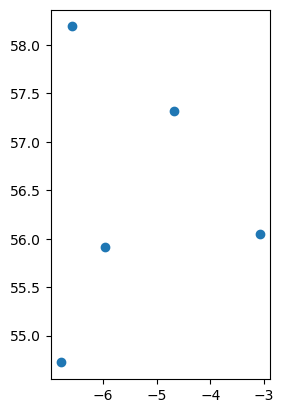

In [7]:
Points_Shape.plot()

<Axes: >

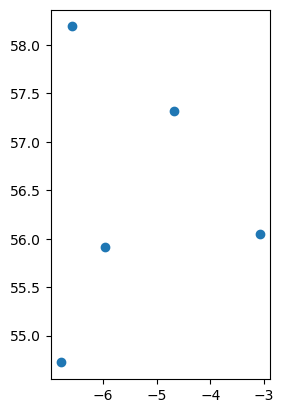

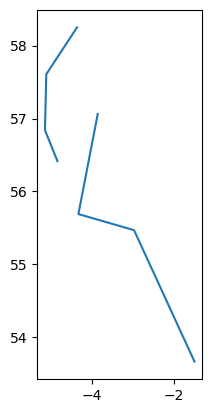

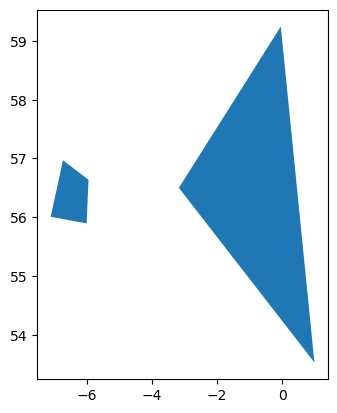

In [8]:
Points_Shape.plot()
Lines_Shape.plot()
Polygons_Shape.plot()

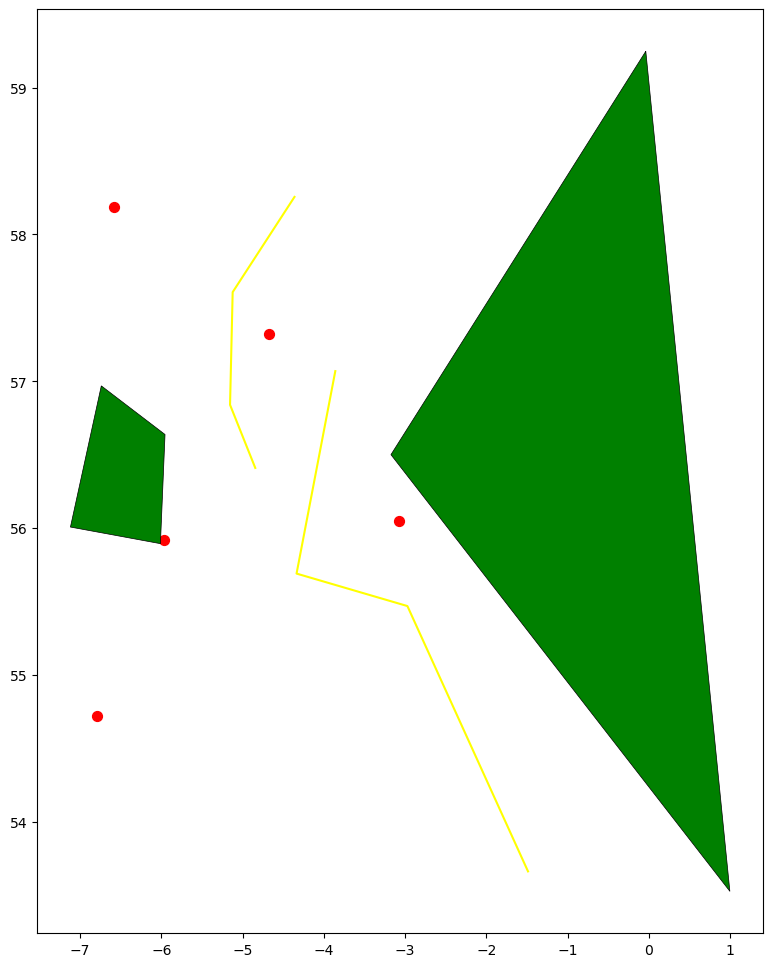

In [9]:
Basic_shapes = Polygons_Shape.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
Points_Shape.plot(ax=Basic_shapes, markersize=50, color='Red')
Lines_Shape.plot(ax=Basic_shapes, color="Yellow")
Shapes_out = Polygons_Shape.plot(ax=Basic_shapes, color="Green")

# Real World Data

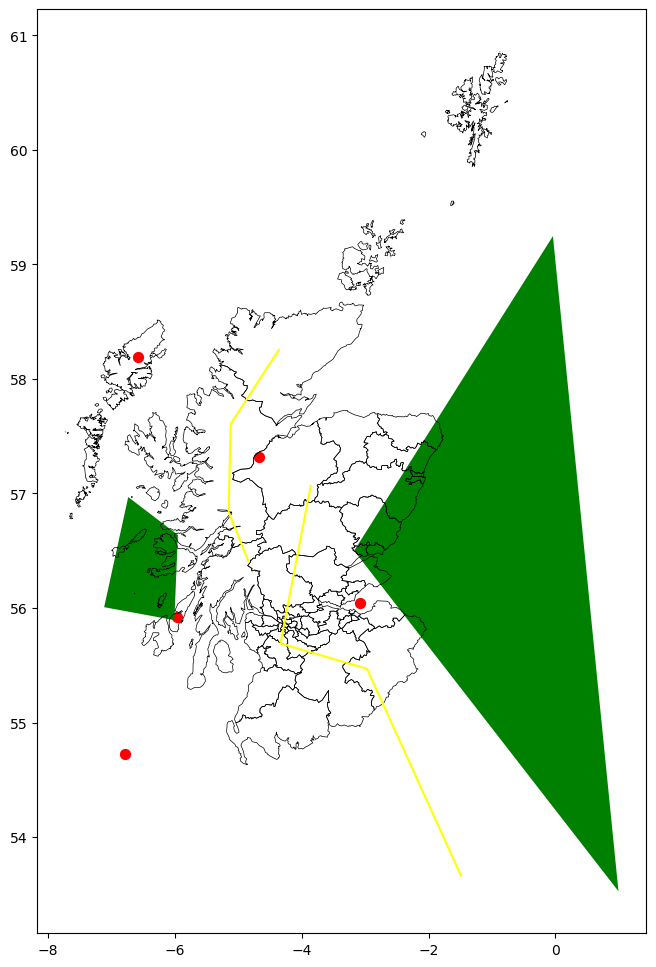

In [10]:
# Adding Scotland shapefile
Scot_plot = gpd.read_file("Data/Shapefiles/Scotland.shp")
Scot_map = Scot_plot.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
Points_Shape.plot(ax=Scot_map, markersize=50, color='Red')
Lines_Shape.plot(ax=Scot_map, color="Yellow")
Scot_shapes = Polygons_Shape.plot(ax=Scot_map, color="Green")

In [11]:
# With this we can see that these basic shapes have geographical data associted with them, tying them to real geographical locations
Scot_plot.geometry.total_bounds

array([-7.73274466, 54.63455337, -0.75334085, 60.86076145])

In [12]:
Scot_plot.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

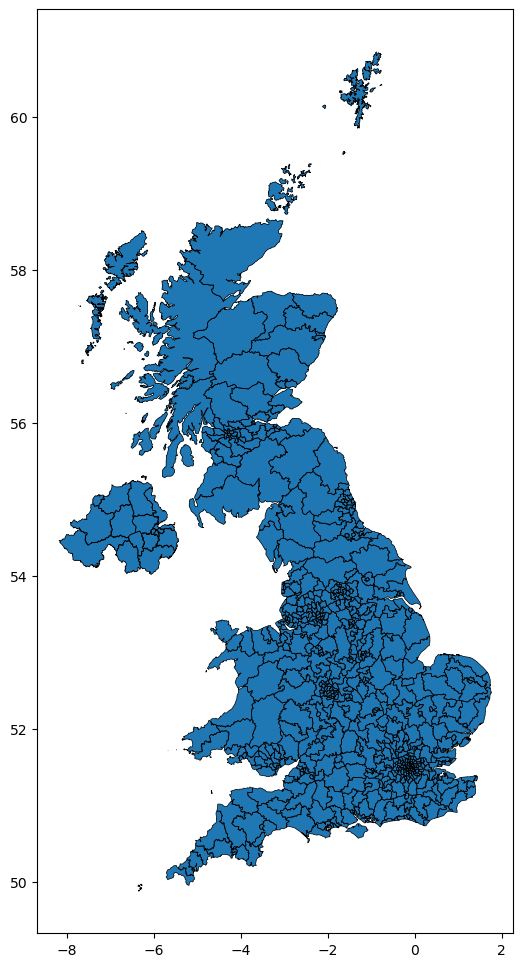

In [13]:
# Adding the remaining UK constituencies to the plot
Constits = gpd.read_file("Data/Shapefiles/Constituencies.shp")
Constits_map = Constits.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
Scot_plot.plot(ax=Constits_map)
Constits_map = Constits.plot(ax=Constits_map)

<Axes: >

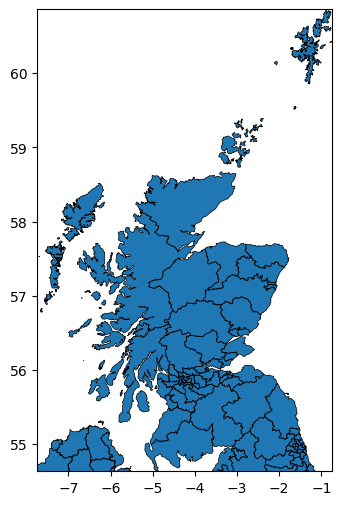

In [14]:
# Zoom in, and adjust the extent by setting an x and y limit based on the extent of a specific shapefile
fig, ax = plt.subplots(figsize = (10,6))
xlim = ([Scot_plot.total_bounds[0],  Scot_plot.total_bounds[2]])
ylim = ([Scot_plot.total_bounds[1],  Scot_plot.total_bounds[3]])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
Constits.plot(ax=ax)
Constits.boundary.plot(color='black', linewidth=0.5, ax=ax)



<Axes: >

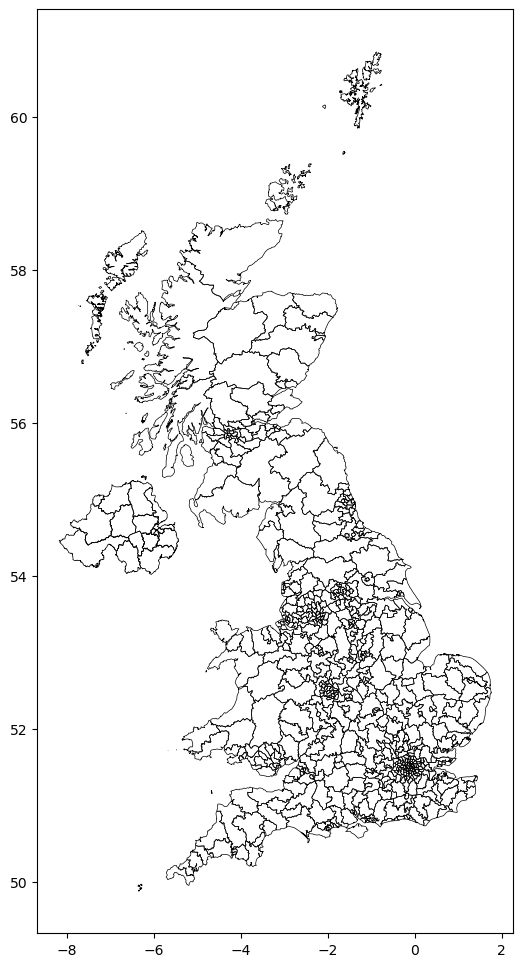

In [15]:
Constits.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)


# Greater Customisation and Visualisation

<Axes: >

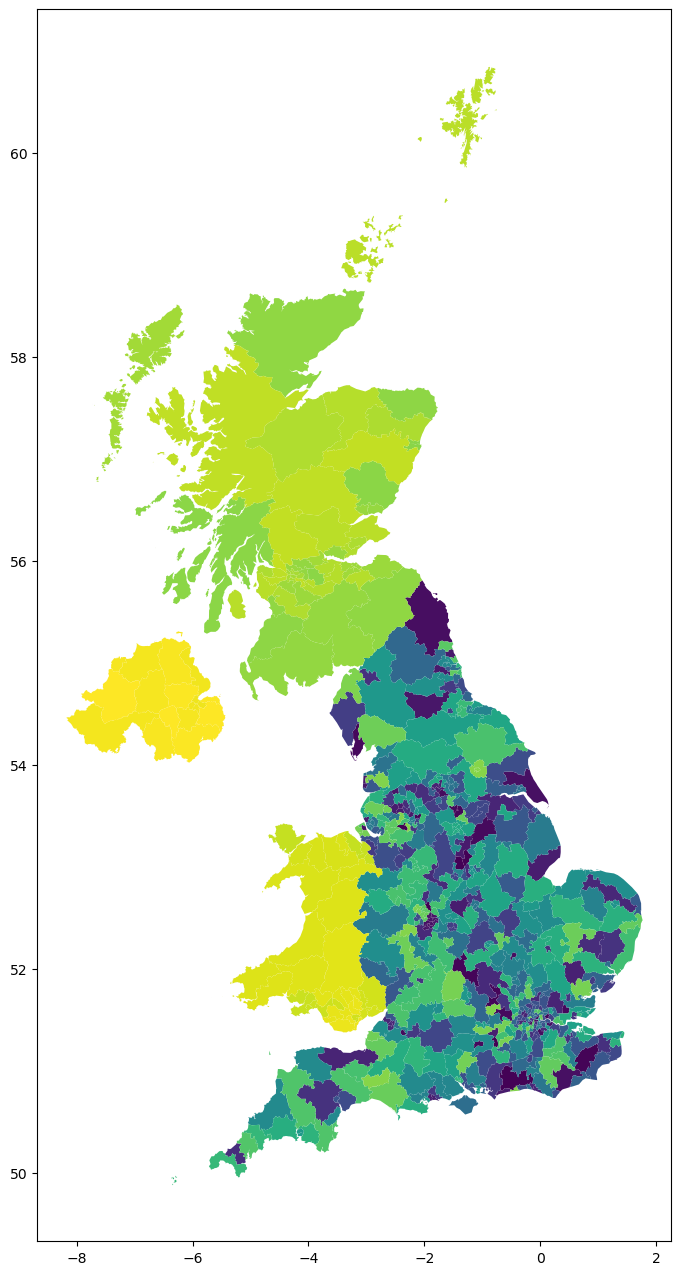

In [16]:
# Note to self: These maps are fine, but not very colourful
Constits.plot(cmap='viridis', figsize=(18,16))

<Axes: >

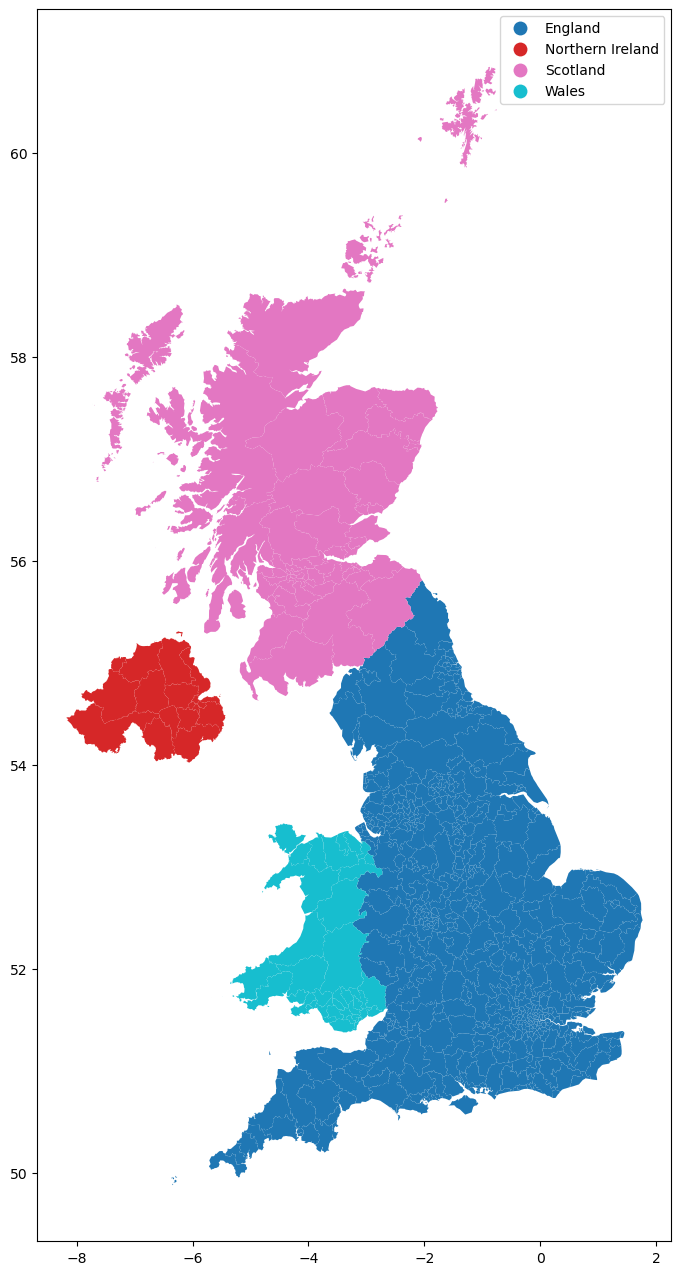

In [17]:
# Colour based on attributes, by using column, and adding a legend
Constits.plot(figsize=(18,16), column='country_na', legend='True')

In [18]:
# Changing colour based on attributes. Make some variables for each country of the UK
Eng = Constits[Constits['country_na'].isin(['England'])]
Scot = Constits[Constits['country_na'].isin(['Scotland'])]
Wales = Constits[Constits['country_na'].isin(['Wales'])]
N_Ire = Constits[Constits['country_na'].isin(['Northern Ireland'])]

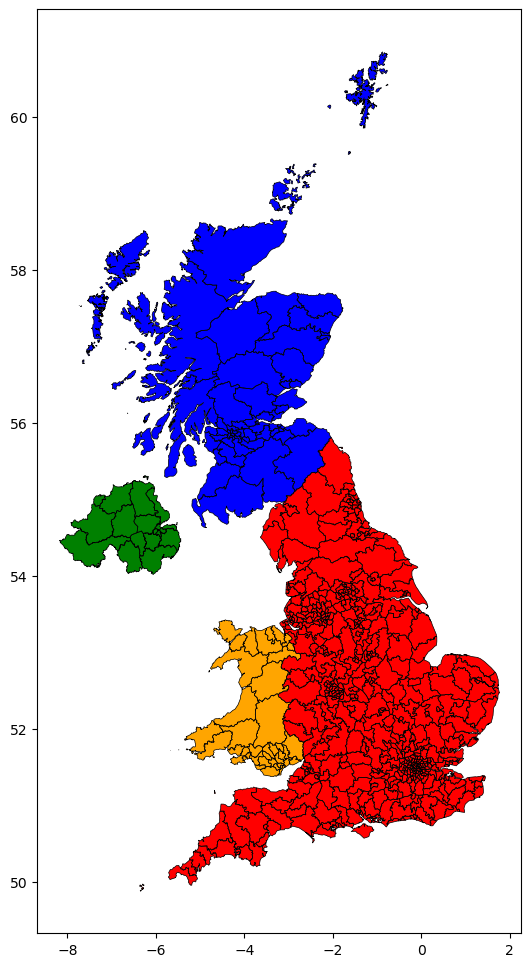

In [19]:
# Plotting each on top of the other, with different colours
UK_Map = Constits.boundary.plot(figsize=(18, 12), color='Black', linewidth=.5)
Eng.plot(ax=UK_Map,  color="Red")
Scot.plot(ax=UK_Map, color="Blue")
Wales.plot(ax=UK_Map, color="Orange")
final_map = N_Ire.plot(ax=UK_Map, color="Green")

# Adding Additional Attributes

In [20]:
# With more attributes linked to the geographic data, there's more room for visualisation
Elec = pd.read_csv('Data/csv/Election_Results.csv')

In [21]:
Elec.head()

constituency_name country_name first_party  electorate  valid_votes  \
0            Aberavon        Wales         Lab       49821        31523   
1           Aberconwy        Wales         Con       45525        30148   
2      Aberdeen North     Scotland         SNP       67745        43936   
3      Aberdeen South     Scotland         SNP       68056        48551   
4  Airdrie and Shotts     Scotland         SNP       66792        44286   

   invalid_votes    turnout  majority    con    lab  ...  green    snp    pc  \
0             57  63.386925     10445   3742  15416  ...    711      0  3663   
1             59  66.352554      3999  12513   8514  ...    727      0  3536   
2             78  64.970108     13396   5304  11397  ...      0  24793     0   
3             56  71.422064      7230  11087  12991  ...    964  20221     0   
4             45  66.371721      8779   3389  15108  ...      0  23887     0   

   dup  sf  sdlp  uup  alliance  other  declaration_time  
0    0   0     0    0         0   1623  08/05/2015 03:19  
1    0   0     0    0         0      0  08/05/2015 02:48  
2    0   0     0    0         0    392  08/05/2015 03:40  
3    0   0     0    0         0    139  08/05/2015 09:39  
4    0   0     0    0         0    136  08/05/2015 03:07  

[5 rows x 22 columns]

In [22]:
# With this we combine the geodataframe with the data from Elec
merged = Constits.set_index('pconname').join(Elec.set_index('constituency_name'))

In [23]:
merged.head()

country_na  \
pconname                              
Aldershot                   England   
Aldridge-Brownhills         England   
Altrincham and Sale West    England   
Amber Valley                England   
Arundel and South Downs     England   

                                                                   geometry  \
pconname                                                                      
Aldershot                 POLYGON ((-0.77548 51.33196, -0.74418 51.30930...   
Aldridge-Brownhills       POLYGON ((-1.90509 52.64319, -1.91599 52.63527...   
Altrincham and Sale West  POLYGON ((-2.31599 53.43466, -2.34552 53.40788...   
Amber Valley              POLYGON ((-1.33164 53.08097, -1.34459 53.06326...   
Arundel and South Downs   POLYGON ((-0.48004 51.04828, -0.47592 51.02089...   

                         country_name first_party  electorate  valid_votes  \
pconname                                                                     
Aldershot                     England         Con       72430        46191   
Aldridge-Brownhills           England         Con       60215        39497   
Altrincham and Sale West      England         Con       71511        50517   
Amber Valley                  England         Con       69510        45717   
Arundel and South Downs       England         Con       77242        56477   

                          invalid_votes    turnout  majority    con  ...  \
pconname                                                             ...   
Aldershot                           114  63.930692     14901  23369  ...   
Aldridge-Brownhills                 105  65.767666     11723  20558  ...   
Altrincham and Sale West            158  70.863224     13290  26771  ...   
Amber Valley                        103  65.918573      4205  20106  ...   
Arundel and South Downs             242  73.430258     26177  34331  ...   

                          green  snp  pc  dup  sf  sdlp  uup  alliance  other  \
pconname                                                                        
Aldershot                  2025    0   0    0   0     0    0         0      0   
Aldridge-Brownhills         826    0   0    0   0     0    0         0    197   
Altrincham and Sale West   1983    0   0    0   0     0    0         0      0   
Amber Valley               1087    0   0    0   0     0    0         0      0   
Arundel and South Downs    3606    0   0    0   0     0    0         0      0   

                          declaration_time  
pconname                                    
Aldershot                 08/05/2015 04:39  
Aldridge-Brownhills       08/05/2015 04:55  
Altrincham and Sale West  08/05/2015 05:34  
Amber Valley              08/05/2015 04:31  
Arundel and South Downs   08/05/2015 07:51  

[5 rows x 23 columns]

# Labels

<Axes: >

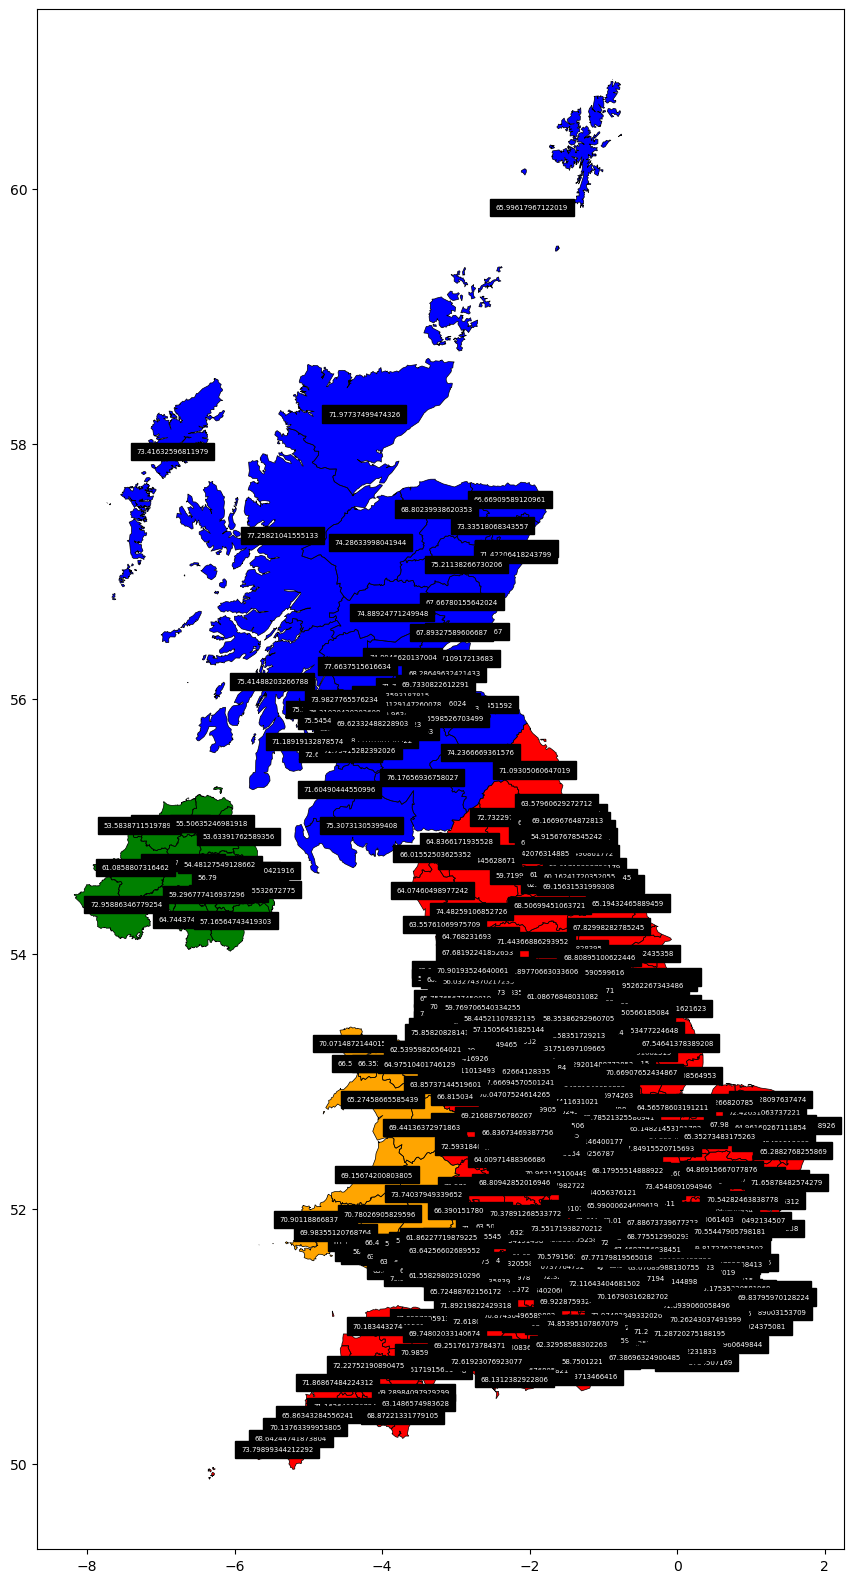

In [24]:
fig, ax = plt.subplots(figsize = (20,20))
merged.apply(lambda x: ax.annotate(text=x.turnout, xy=x.geometry.centroid.coords[0], ha='center', fontsize=5, backgroundcolor="black", color="White"),axis=1);
merged.boundary.plot(ax=ax, color="Black", linewidth=0.5)
Eng.plot(ax=ax,  color="Red")
Scot.plot(ax=ax, color="Blue")
Wales.plot(ax=ax, color="Orange")
N_Ire.plot(ax=ax, color="Green")
# Annotate allows text to be added, and further detail can be plotted over this with various parameters
# Though with so many different small constituencies, this specific labeling is not particularly helpful...

### An example with Scotland isolated

Text(531.3539121194341, 0.5, 'Latitude')

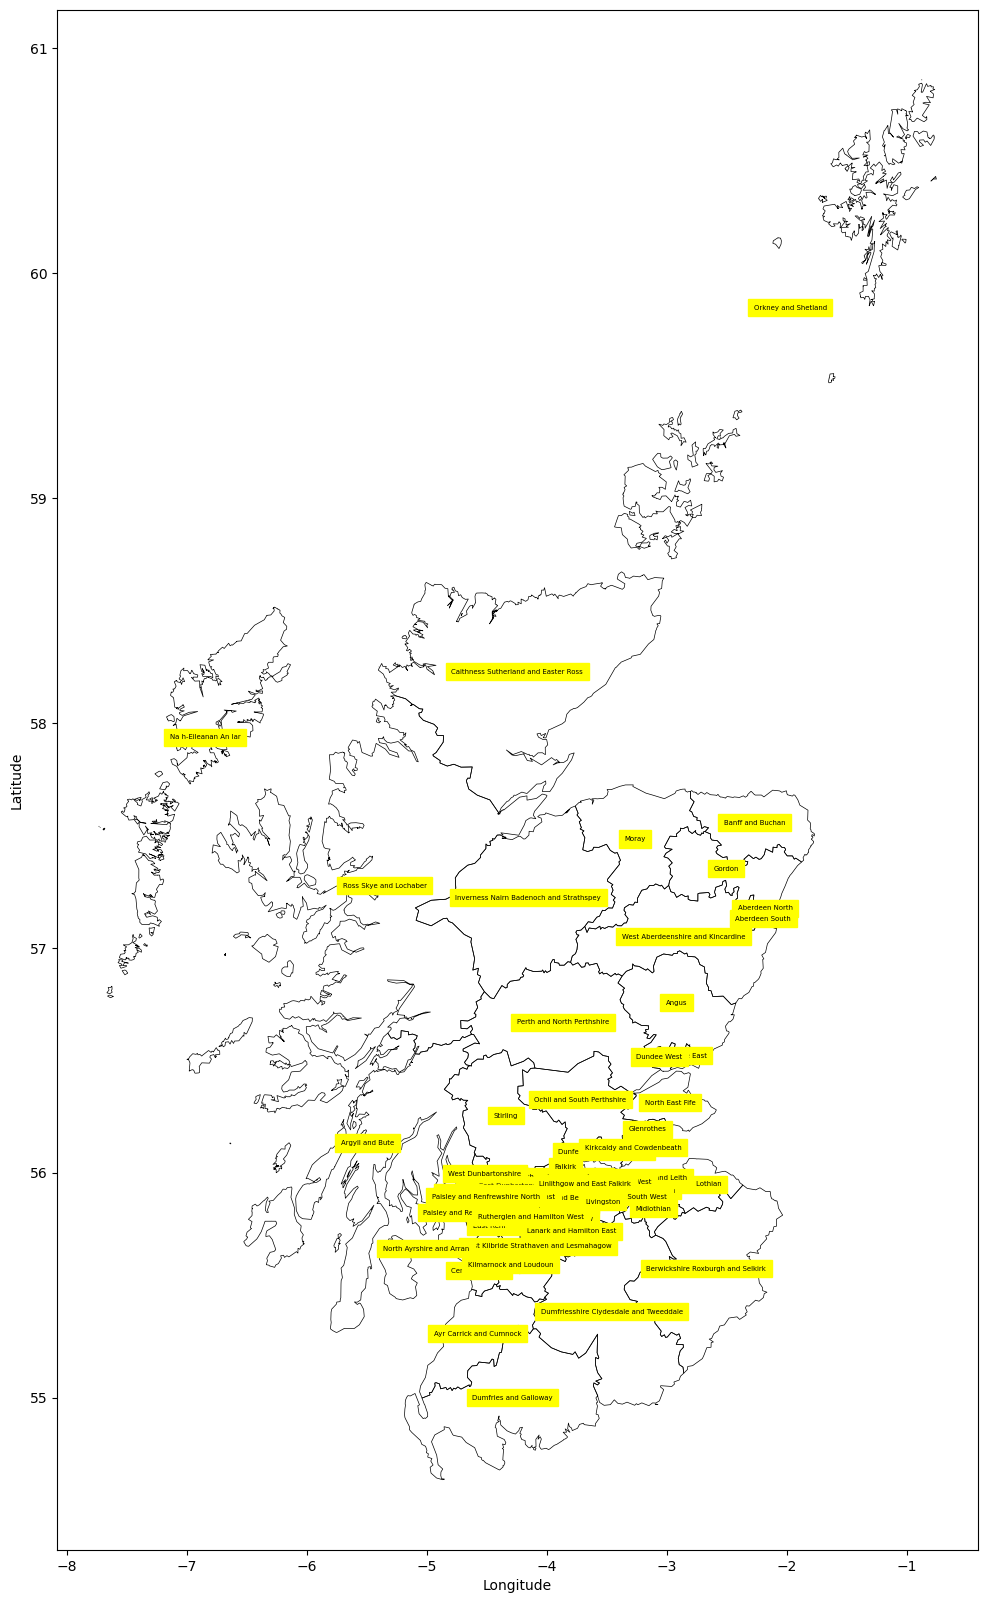

In [26]:
fig, ax = plt.subplots(figsize = (20,20))
Scot_plot.apply(lambda x: ax.annotate(text=x.pconname, xy=x.geometry.centroid.coords[0], ha='center', fontsize=5, backgroundcolor="yellow", color="black"),axis=1);
Scot_plot.boundary.plot(ax=ax, color="Black", linewidth=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Plot New Attributes

<Axes: >

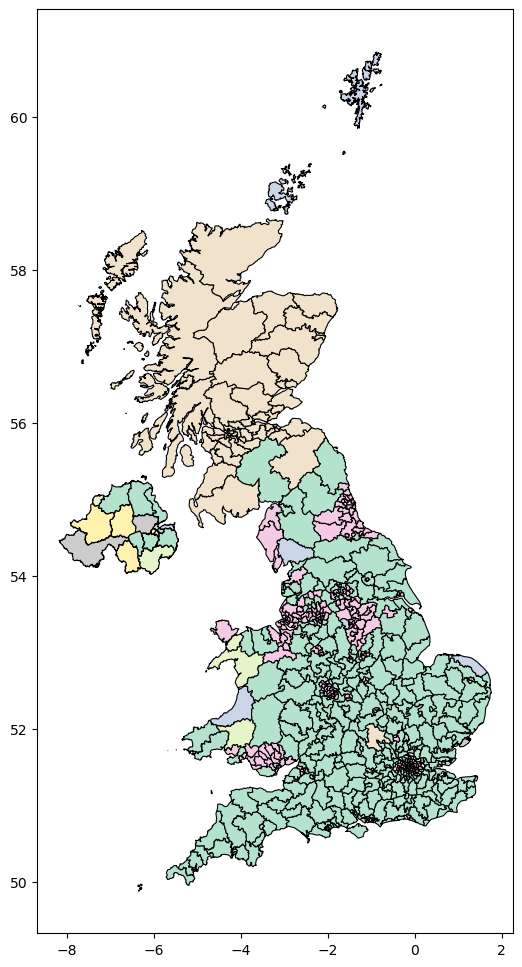

In [28]:
# Making more meaningful visualisations
merged.plot(column='first_party', cmap='Pastel2', linewidth=0.8, edgecolor='Black', figsize=(18, 12))

In [29]:
# Using more appropriate colours for this visualisation based on winning parties in each constituency
Con = merged[merged['first_party'].isin(['Con'])]
Lab = merged[merged['first_party'].isin(['Lab'])]
SNP = merged[merged['first_party'].isin(['SNP'])]
LD = merged[merged['first_party'].isin(['LD'])]
DUP = merged[merged['first_party'].isin(['DUP'])]
PC = merged[merged['first_party'].isin(['PC'])]
Green = merged[merged['first_party'].isin(['Green'])]
SF = merged[merged['first_party'].isin(['SF'])]
SDLP = merged[merged['first_party'].isin(['SDLP'])]
UUP = merged[merged['first_party'].isin(['UUP'])]
Ind = merged[merged['first_party'].isin(['Ind'])]
UKIP = merged[merged['first_party'].isin(['UKIP'])]
Spk = merged[merged['first_party'].isin(['Spk'])]

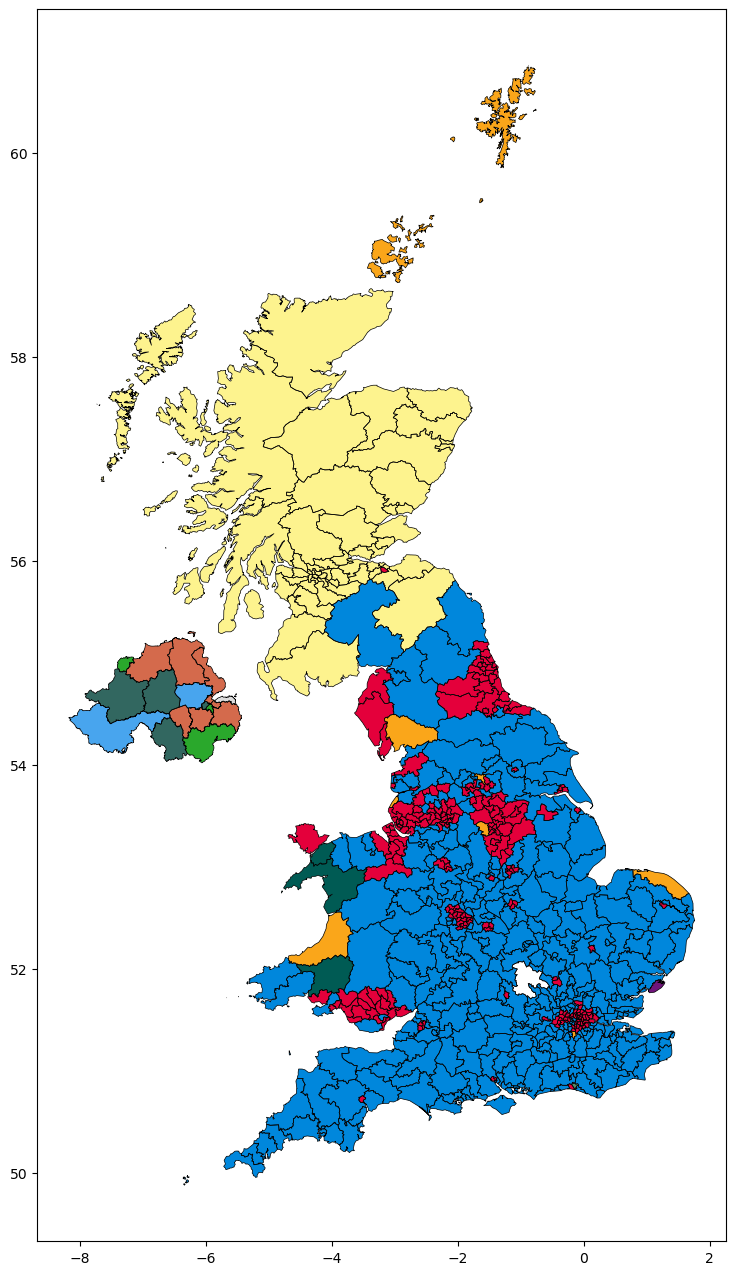

In [30]:
UK_part_map = merged.boundary.plot(figsize=(18, 16), color='Black', linewidth=.5)
Con.plot(ax=UK_part_map, color="#0087DC")
Lab.plot(ax=UK_part_map, color="#E4003B")
SNP.plot(ax=UK_part_map, color="#FDF38E")
LD.plot(ax=UK_part_map, color="#FAA61A")
DUP.plot(ax=UK_part_map, color="#D46A4C")
PC.plot(ax=UK_part_map, color="#005B54")
Green.plot(ax=UK_part_map, color="#528D6B")
SF.plot(ax=UK_part_map, color="#326760")
SDLP.plot(ax=UK_part_map, color="#2AA82C")
UUP.plot(ax=UK_part_map, color="#48A5EE")
Ind.plot(ax=UK_part_map, color="#DDDDDD")
UKIP.plot(ax=UK_part_map, color="#70147A")
final_map = Spk.plot(ax=UK_part_map, color="white")

# Combining Plots

<Axes: title={'center': '2015 Election Turnout'}>

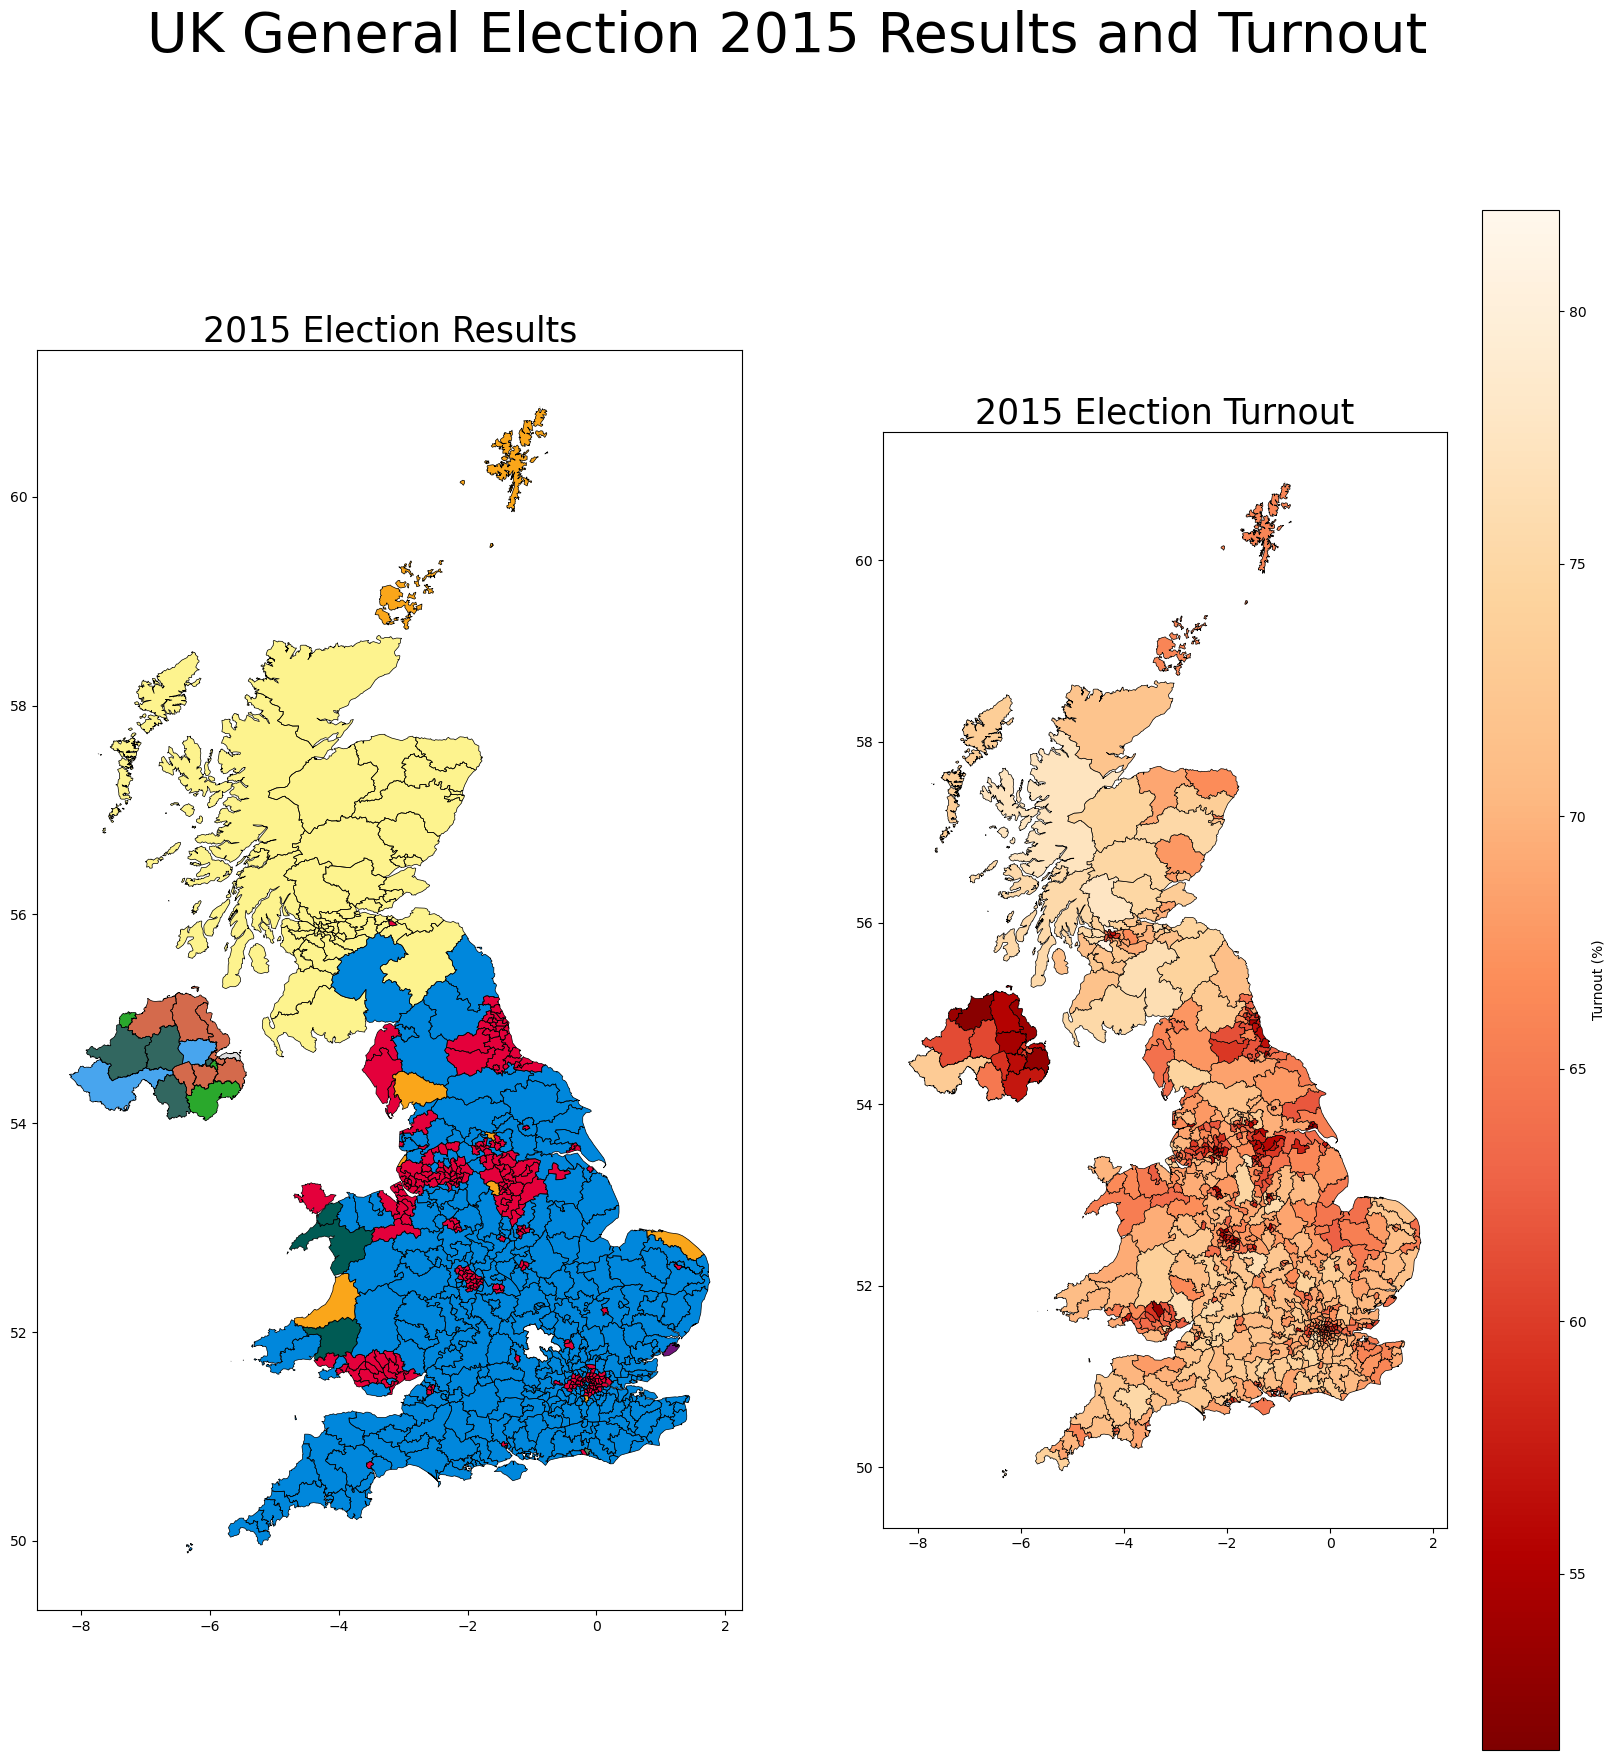

In [31]:
fig = plt.figure(figsize=(20,20))
fig.suptitle('UK General Election 2015 Results and Turnout', fontsize=40)
ax1 = fig.add_subplot(121)

ax1.set_title('2015 Election Results', fontdict={'fontsize': '25', 'fontweight' : '3'})

merged.boundary.plot(ax=ax1,color='Black', linewidth=.5)
Con.plot(ax=ax1, color="#0087DC")
Lab.plot(ax=ax1, color="#E4003B")
SNP.plot(ax=ax1, color="#FDF38E")
LD.plot(ax=ax1, color="#FAA61A")
DUP.plot(ax=ax1, color="#D46A4C")
PC.plot(ax=ax1, color="#005B54")
Green.plot(ax=ax1, color="#528D6B")
SF.plot(ax=ax1, color="#326760")
SDLP.plot(ax=ax1, color="#2AA82C")
UUP.plot(ax=ax1, color="#48A5EE")
Ind.plot(ax=ax1, color="#DDDDDD")
UKIP.plot(ax=ax1, color="#70147A")
Spk.plot(ax=ax1, color="white")

ax2 = fig.add_subplot(122)
ax2.set_title('2015 Election Turnout', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged.plot(column='turnout', cmap='OrRd_r', linewidth=0.5, edgecolor='Black', figsize=(18, 12), ax=ax2, legend='True', legend_kwds={'label': "Turnout (%)"})

Text(1062.4267676767674, 0.5, 'Latitude')

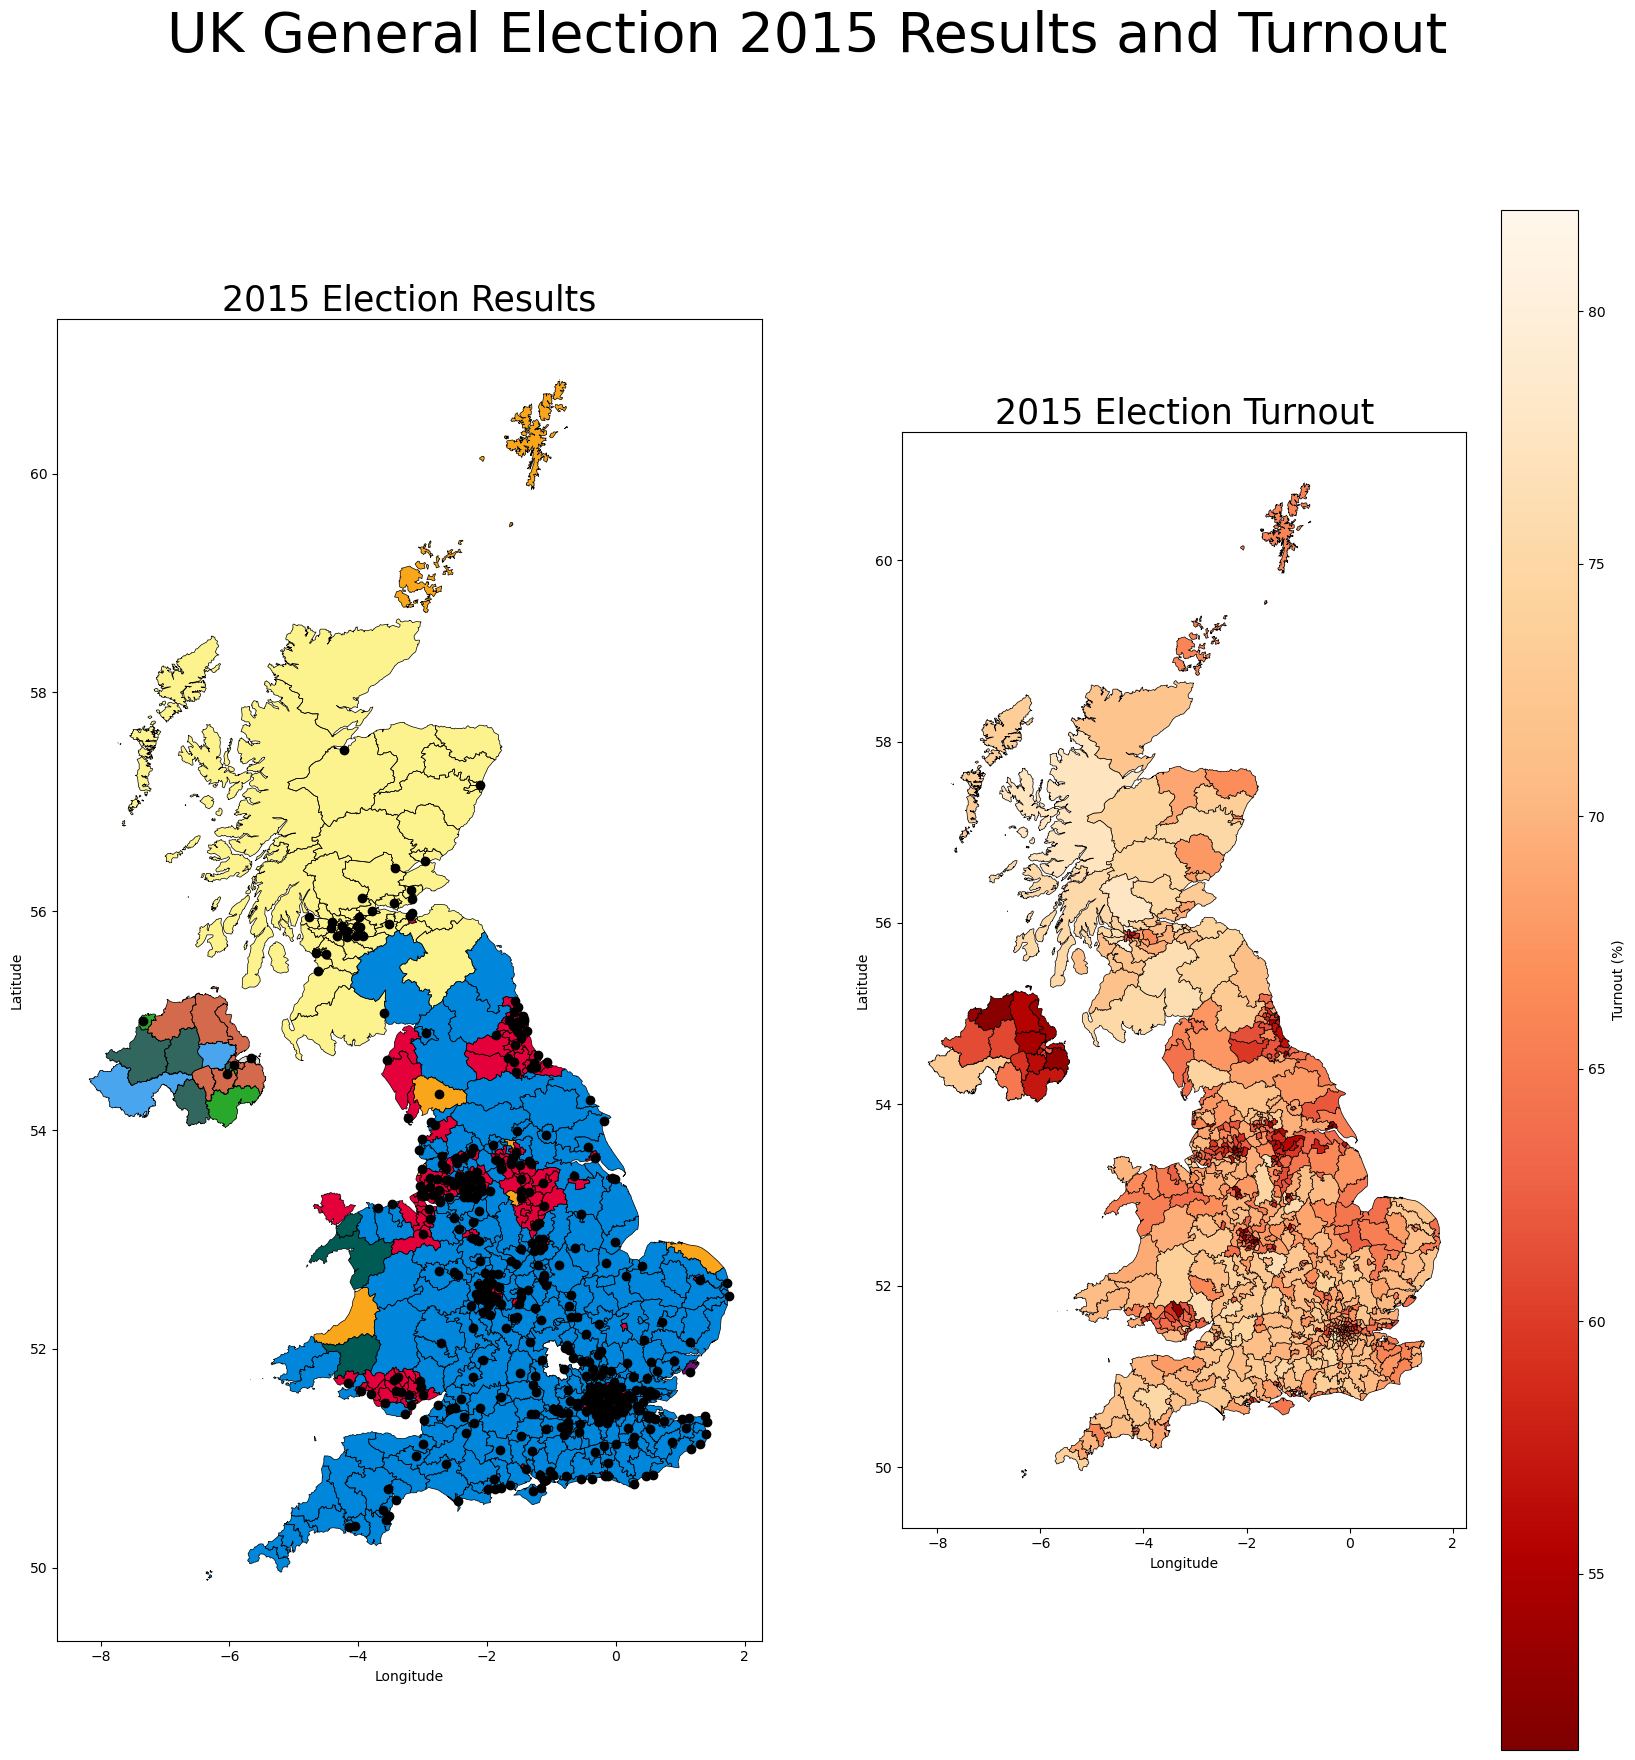

In [32]:
# Overlaying additional shapefiles in different formats (in this case Cities points) is straightforward
Cities = gpd.read_file("Data/Shapefiles/Cities.shp")

fig = plt.figure(figsize=(20,20))
fig.suptitle('UK General Election 2015 Results and Turnout', fontsize=40)

# The (121) arguments shows that there is 1 row, 2 columns and the current axis is plot 1
ax1 = fig.add_subplot(121)

ax1.set_title('2015 Election Results', fontdict={'fontsize': '25', 'fontweight' : '3'})

merged.boundary.plot(ax=ax1,color='Black', linewidth=.5)
Con.plot(ax=ax1, color="#0087DC")
Lab.plot(ax=ax1, color="#E4003B")
SNP.plot(ax=ax1, color="#FDF38E")
LD.plot(ax=ax1, color="#FAA61A")
DUP.plot(ax=ax1, color="#D46A4C")
PC.plot(ax=ax1, color="#005B54")
Green.plot(ax=ax1, color="#528D6B")
SF.plot(ax=ax1, color="#326760")
SDLP.plot(ax=ax1, color="#2AA82C")
UUP.plot(ax=ax1, color="#48A5EE")
Ind.plot(ax=ax1, color="#DDDDDD")
UKIP.plot(ax=ax1, color="#70147A")
Spk.plot(ax=ax1, color="white")
Cities.plot(ax=ax1, color="black")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ax2 = fig.add_subplot(122)
ax2.set_title('2015 Election Turnout', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged.plot(column='turnout', cmap='OrRd_r', linewidth=0.5, edgecolor='Black', figsize=(18, 12), ax=ax2, legend='True', legend_kwds={'label': "Turnout (%)"})
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exporting Plots

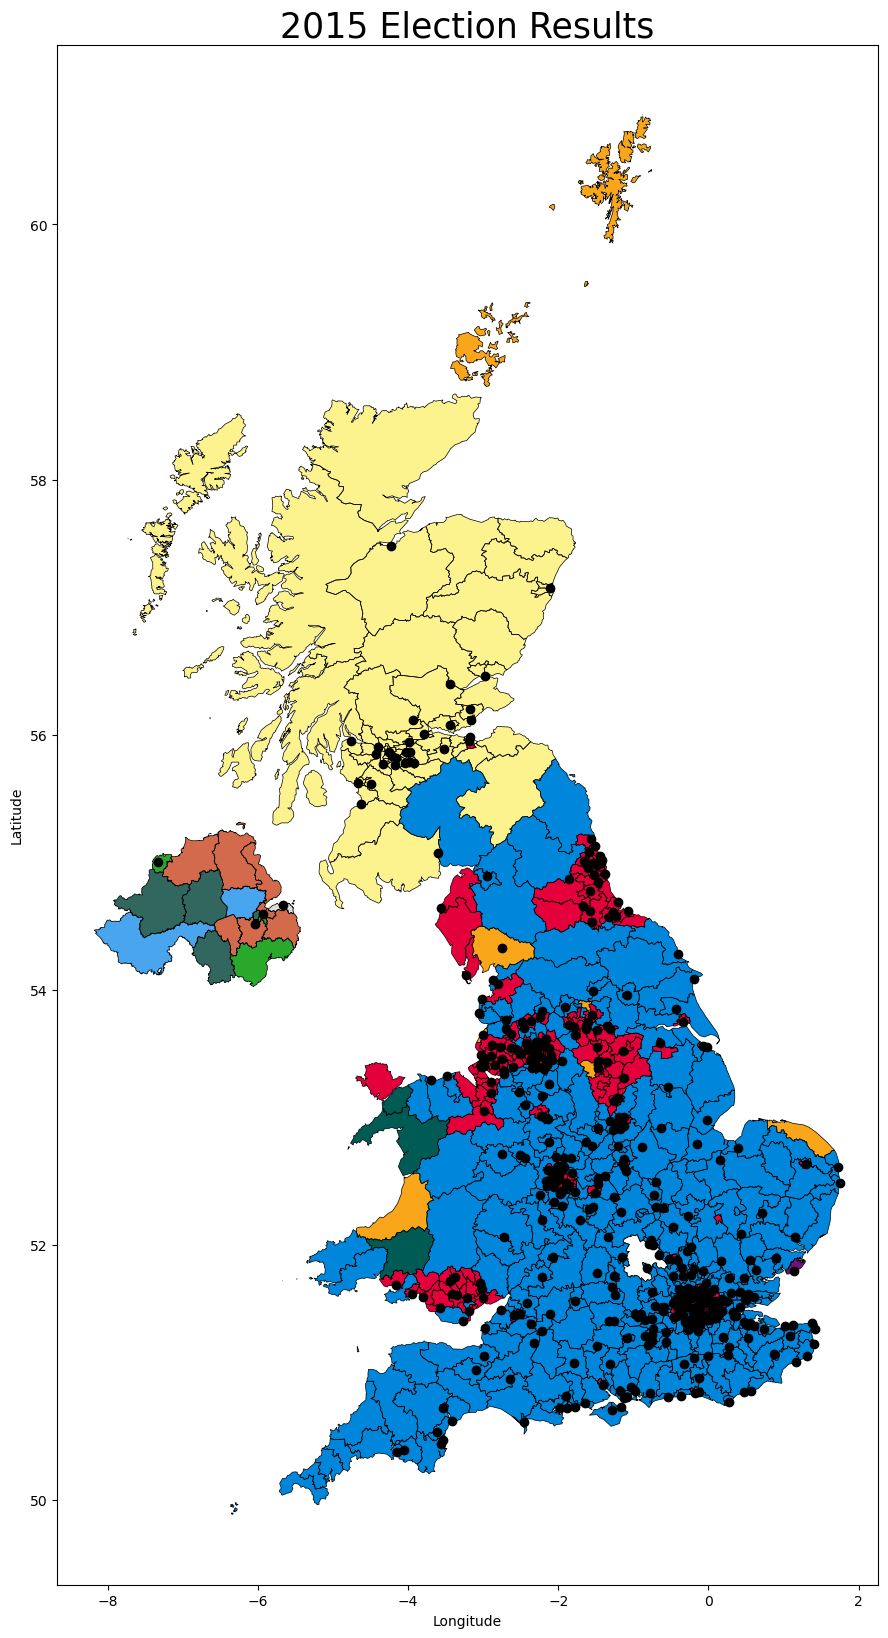

In [33]:
# Plots can be exported as various different formats using .savefig()
# This can be used in conjuction with, or instead of visualising the plot
fig, ax = plt.subplots(figsize = (20,20))

ax.set_title('2015 Election Results', fontdict={'fontsize': '25', 'fontweight' : '3'})

merged.boundary.plot(ax=ax,color='Black', linewidth=.5)
Con.plot(ax=ax, color="#0087DC")
Lab.plot(ax=ax, color="#E4003B")
SNP.plot(ax=ax, color="#FDF38E")
LD.plot(ax=ax, color="#FAA61A")
DUP.plot(ax=ax, color="#D46A4C")
PC.plot(ax=ax, color="#005B54")
Green.plot(ax=ax, color="#528D6B")
SF.plot(ax=ax, color="#326760")
SDLP.plot(ax=ax, color="#2AA82C")
UUP.plot(ax=ax, color="#48A5EE")
Ind.plot(ax=ax, color="#DDDDDD")
UKIP.plot(ax=ax, color="#70147A")
Spk.plot(ax=ax, color="white")
Cities.plot(ax=ax, color="black")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('Output/Results.png')

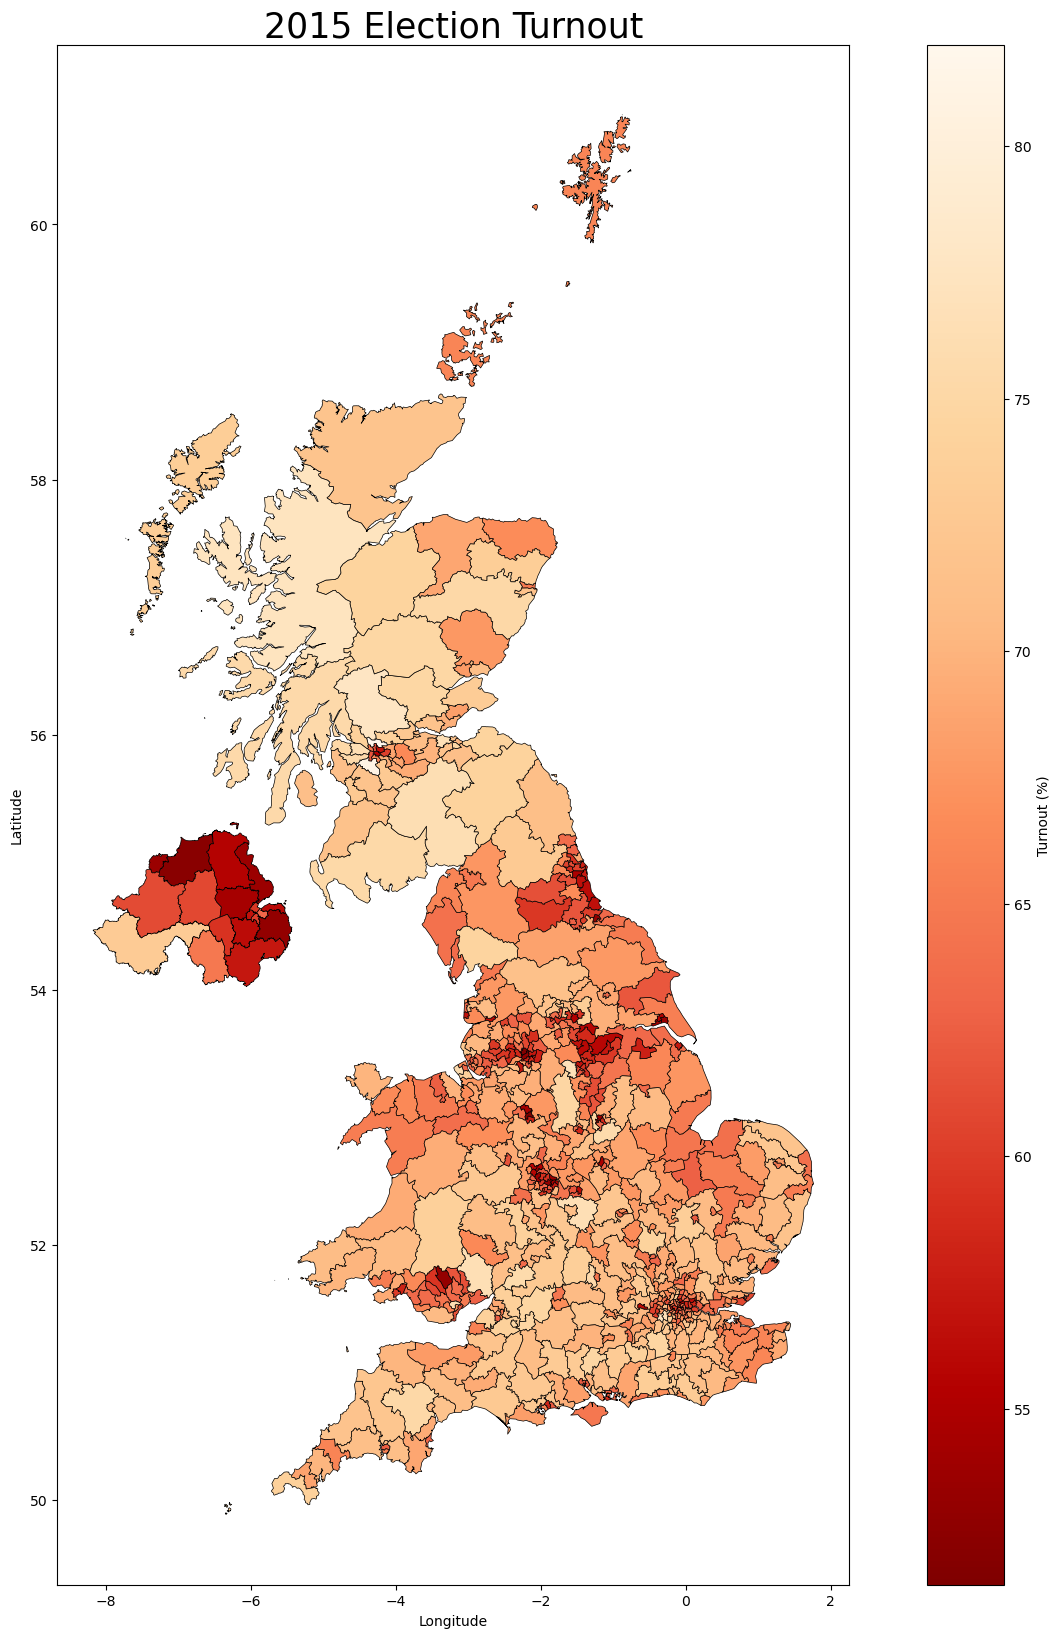

In [34]:
# .savefig() has additional options for the desired output

fig, ax = plt.subplots(figsize = (20,20))
ax.set_title('2015 Election Turnout', fontdict={'fontsize': '25', 'fontweight' : '3'})
merged.plot(column='turnout', cmap='OrRd_r', linewidth=0.5, edgecolor='Black', figsize=(18, 12), ax=ax, legend='True', legend_kwds={'label': "Turnout (%)"})
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('Output/Turnout.jpg', dpi=30, transparent='True', bbox_inches='tight')